# Deskew, Scale, PCA 

####  Goals
* `train_test_split`, deskew, and scale fitting on `X_train` and transforming on `X_test`.
* PCA on scaled data.
* Cluster analysis on PCA components.

#### Output 
* Augmented datasets with PCA data.

In [1]:
cd ..

/home/jovyan/Capstone


In [2]:
%run lib/__init__.py
%run ./lib/preprocessing.py
%matplotlib inline

## 0. Load Data

In [3]:
removed_outliers_raw_df = pd.read_pickle('./data/removed_outliers_raw_df.pkl')
removed_outliers_raw_df.shape

(1007, 86)

In [4]:
# to get a list of the numerical columns
commute_stats_df = pd.read_pickle('./data/commute_stats_dropped_correlated_features_df.pkl')
commute_stats_df.shape

(40, 8)

## 1. `train_test_split` on ... `commute_removed_outliers_df`

In [5]:
data_set   = removed_outliers_raw_df.drop(['Alone_Share'], axis=1)
target_set = removed_outliers_raw_df['Alone_Share']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data_set, target_set, test_size=0.3)

## 2. Separate Numeric from Categorical Columns

In [7]:
numeric_columns = list(commute_stats_df.index)
numeric_columns.remove('Alone_Share')

In [8]:
X_train_numeric = X_train[numeric_columns]
X_test_numeric  = X_test[numeric_columns]
X_train_numeric.shape, X_test_numeric.shape

((704, 39), (303, 39))

In [9]:
X_train_numeric += 1E-9
X_test_numeric += 1E-9

## 3. Pipeline Build
* BoxCoxTransformer
* StandardScaler

In [10]:
from lib.preprocessing import BoxCoxTransformer

In [11]:
pipeline = Pipeline([
    ('boxcox'  , BoxCoxTransformer()),
    ('ss'      , StandardScaler())
])

In [12]:
X_train_pipe = pipeline.fit_transform(X_train_numeric)

In [13]:
X_test_pipe = pipeline.transform(X_test_numeric)

In [14]:
X_train_sc_df = pd.DataFrame(X_train_pipe, 
                             columns=X_train_numeric.columns,
                             index=X_train_numeric.index)

In [15]:
X_test_sc_df = pd.DataFrame(X_test_pipe, 
                            columns=X_test_numeric.columns,
                            index=X_test_numeric.index)

## 4. PCA
* On numeric features only

In [16]:
pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(X_train_pipe)
pca.components_ # these are loadings, 
pca.explained_variance_ratio_

array([ 0.18748629,  0.1101334 ,  0.05977808,  0.05154926,  0.04867483,
        0.04236097,  0.0407604 ,  0.0376572 ,  0.03252323,  0.03165979,
        0.0298611 ,  0.0275115 ,  0.02509494,  0.02368666,  0.02354079])

In [17]:
X_train_pca_df = pd.DataFrame(X_train_pca, 
                              columns=['PComponent_1',
                                       'PComponent_2',
                                       'PComponent_3',
                                       'PComponent_4',
                                       'PComponent_5',
                                       'PComponent_6',
                                       'PComponent_7',
                                       'PComponent_8',
                                       'PComponent_9',
                                       'PComponent_10',
                                       'PComponent_11',
                                       'PComponent_12',
                                       'PComponent_13',
                                       'PComponent_14',
                                       'PComponent_15'],
                              index=X_train_numeric.index)
X_train_pca_df.head()

,PComponent_1,PComponent_2,PComponent_3,PComponent_4,PComponent_5,PComponent_6,PComponent_7,PComponent_8,PComponent_9,PComponent_10,PComponent_11,PComponent_12,PComponent_13,PComponent_14,PComponent_15
833,-0.835033,-2.504127,-0.403743,0.640165,-2.796234,0.345933,-1.750973,0.825252,-1.176235,-1.822913,1.151963,1.279551,0.540787,-0.714931,-0.231140
921,-1.644658,0.994406,0.675552,-2.291614,2.231195,1.736105,-0.618579,-0.249915,-1.619330,-0.779461,-0.564270,-1.397356,0.750616,0.001494,-0.688197
483,2.950591,-0.202647,0.723989,0.226856,-0.547925,-1.766535,-1.428619,0.517026,-0.469301,1.479115,-1.088312,-0.684321,0.426586,-0.743786,-0.349642
854,-4.482195,-0.037559,-0.463214,1.774679,1.253960,1.689037,-0.748329,1.535939,-0.125223,0.577486,0.526473,-0.125837,-0.283754,1.899945,0.412534
310,-1.442658,-0.255150,-1.181805,3.165655,1.746638,3.041005,-0.089167,1.007651,-1.469829,0.905002,-0.599376,0.439415,-1.222533,-1.234994,-1.653524


In [18]:
X_test_pca = pca.transform(X_test_pipe)
X_test_pca_df = pd.DataFrame(X_test_pca, 
                              columns=['PComponent_1',
                                       'PComponent_2',
                                       'PComponent_3',
                                       'PComponent_4',
                                       'PComponent_5',
                                       'PComponent_6',
                                       'PComponent_7',
                                       'PComponent_8',
                                       'PComponent_9',
                                       'PComponent_10',
                                       'PComponent_11',
                                       'PComponent_12',
                                       'PComponent_13',
                                       'PComponent_14',
                                       'PComponent_15'],
                              index=X_test_numeric.index)
X_test_pca_df.head()

,PComponent_1,PComponent_2,PComponent_3,PComponent_4,PComponent_5,PComponent_6,PComponent_7,PComponent_8,PComponent_9,PComponent_10,PComponent_11,PComponent_12,PComponent_13,PComponent_14,PComponent_15
180,-5.394034,0.094345,2.010276,-0.189314,-1.314139,0.085406,0.741954,1.339524,0.878557,-1.514756,-1.091517,-2.132390,0.179137,0.217028,-0.958499
105,-3.950370,-1.631405,0.280865,2.255840,0.900265,-0.125071,-0.445535,0.905067,0.042572,-0.416080,-0.549795,-1.195617,-0.209929,1.231446,0.759051
134,-5.323652,-0.058311,0.952121,2.027205,1.579601,1.237728,0.099254,1.029280,-0.771024,0.262850,-0.089960,0.501563,-1.269401,0.419938,0.576786
998,2.720696,0.399760,0.769447,-0.929759,0.915398,-0.044065,-1.721823,1.630611,-0.438872,1.262093,0.217991,-1.212804,-0.542689,1.266779,0.531590
810,-3.248980,-0.181584,1.095380,-0.917716,-1.358784,0.850239,0.241832,-2.166527,0.396574,-0.031299,0.211548,0.178546,-0.339754,0.547482,-1.086744


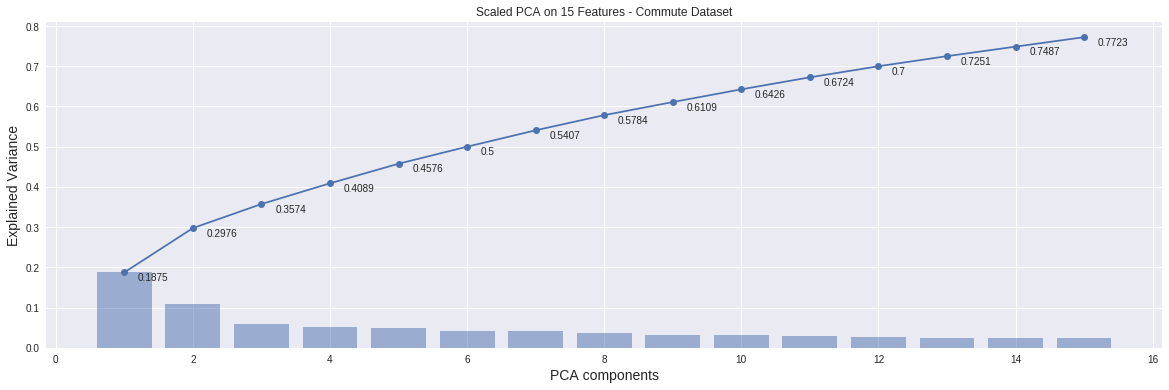

In [19]:
fig = plt.figure(figsize=(20,6))

x = np.arange(1,16)
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(x, cumulative_explained_variance,'-o')
plt.bar(x, pca.explained_variance_ratio_, align='center', alpha=0.5)

for i,j in zip(x, np.cumsum(pca.explained_variance_ratio_)):
    plt.annotate(str(j.round(4)),xy=(i+.2,j-.02))

plt.xlabel('PCA components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Scaled PCA on 15 Features - Commute Dataset')
plt.savefig('./figures/pca-15-features.png')

In [20]:
import lib.viz_helper as viz

In [21]:
pca = PCA(n_components=5)
pca.fit(X_train_sc_df)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

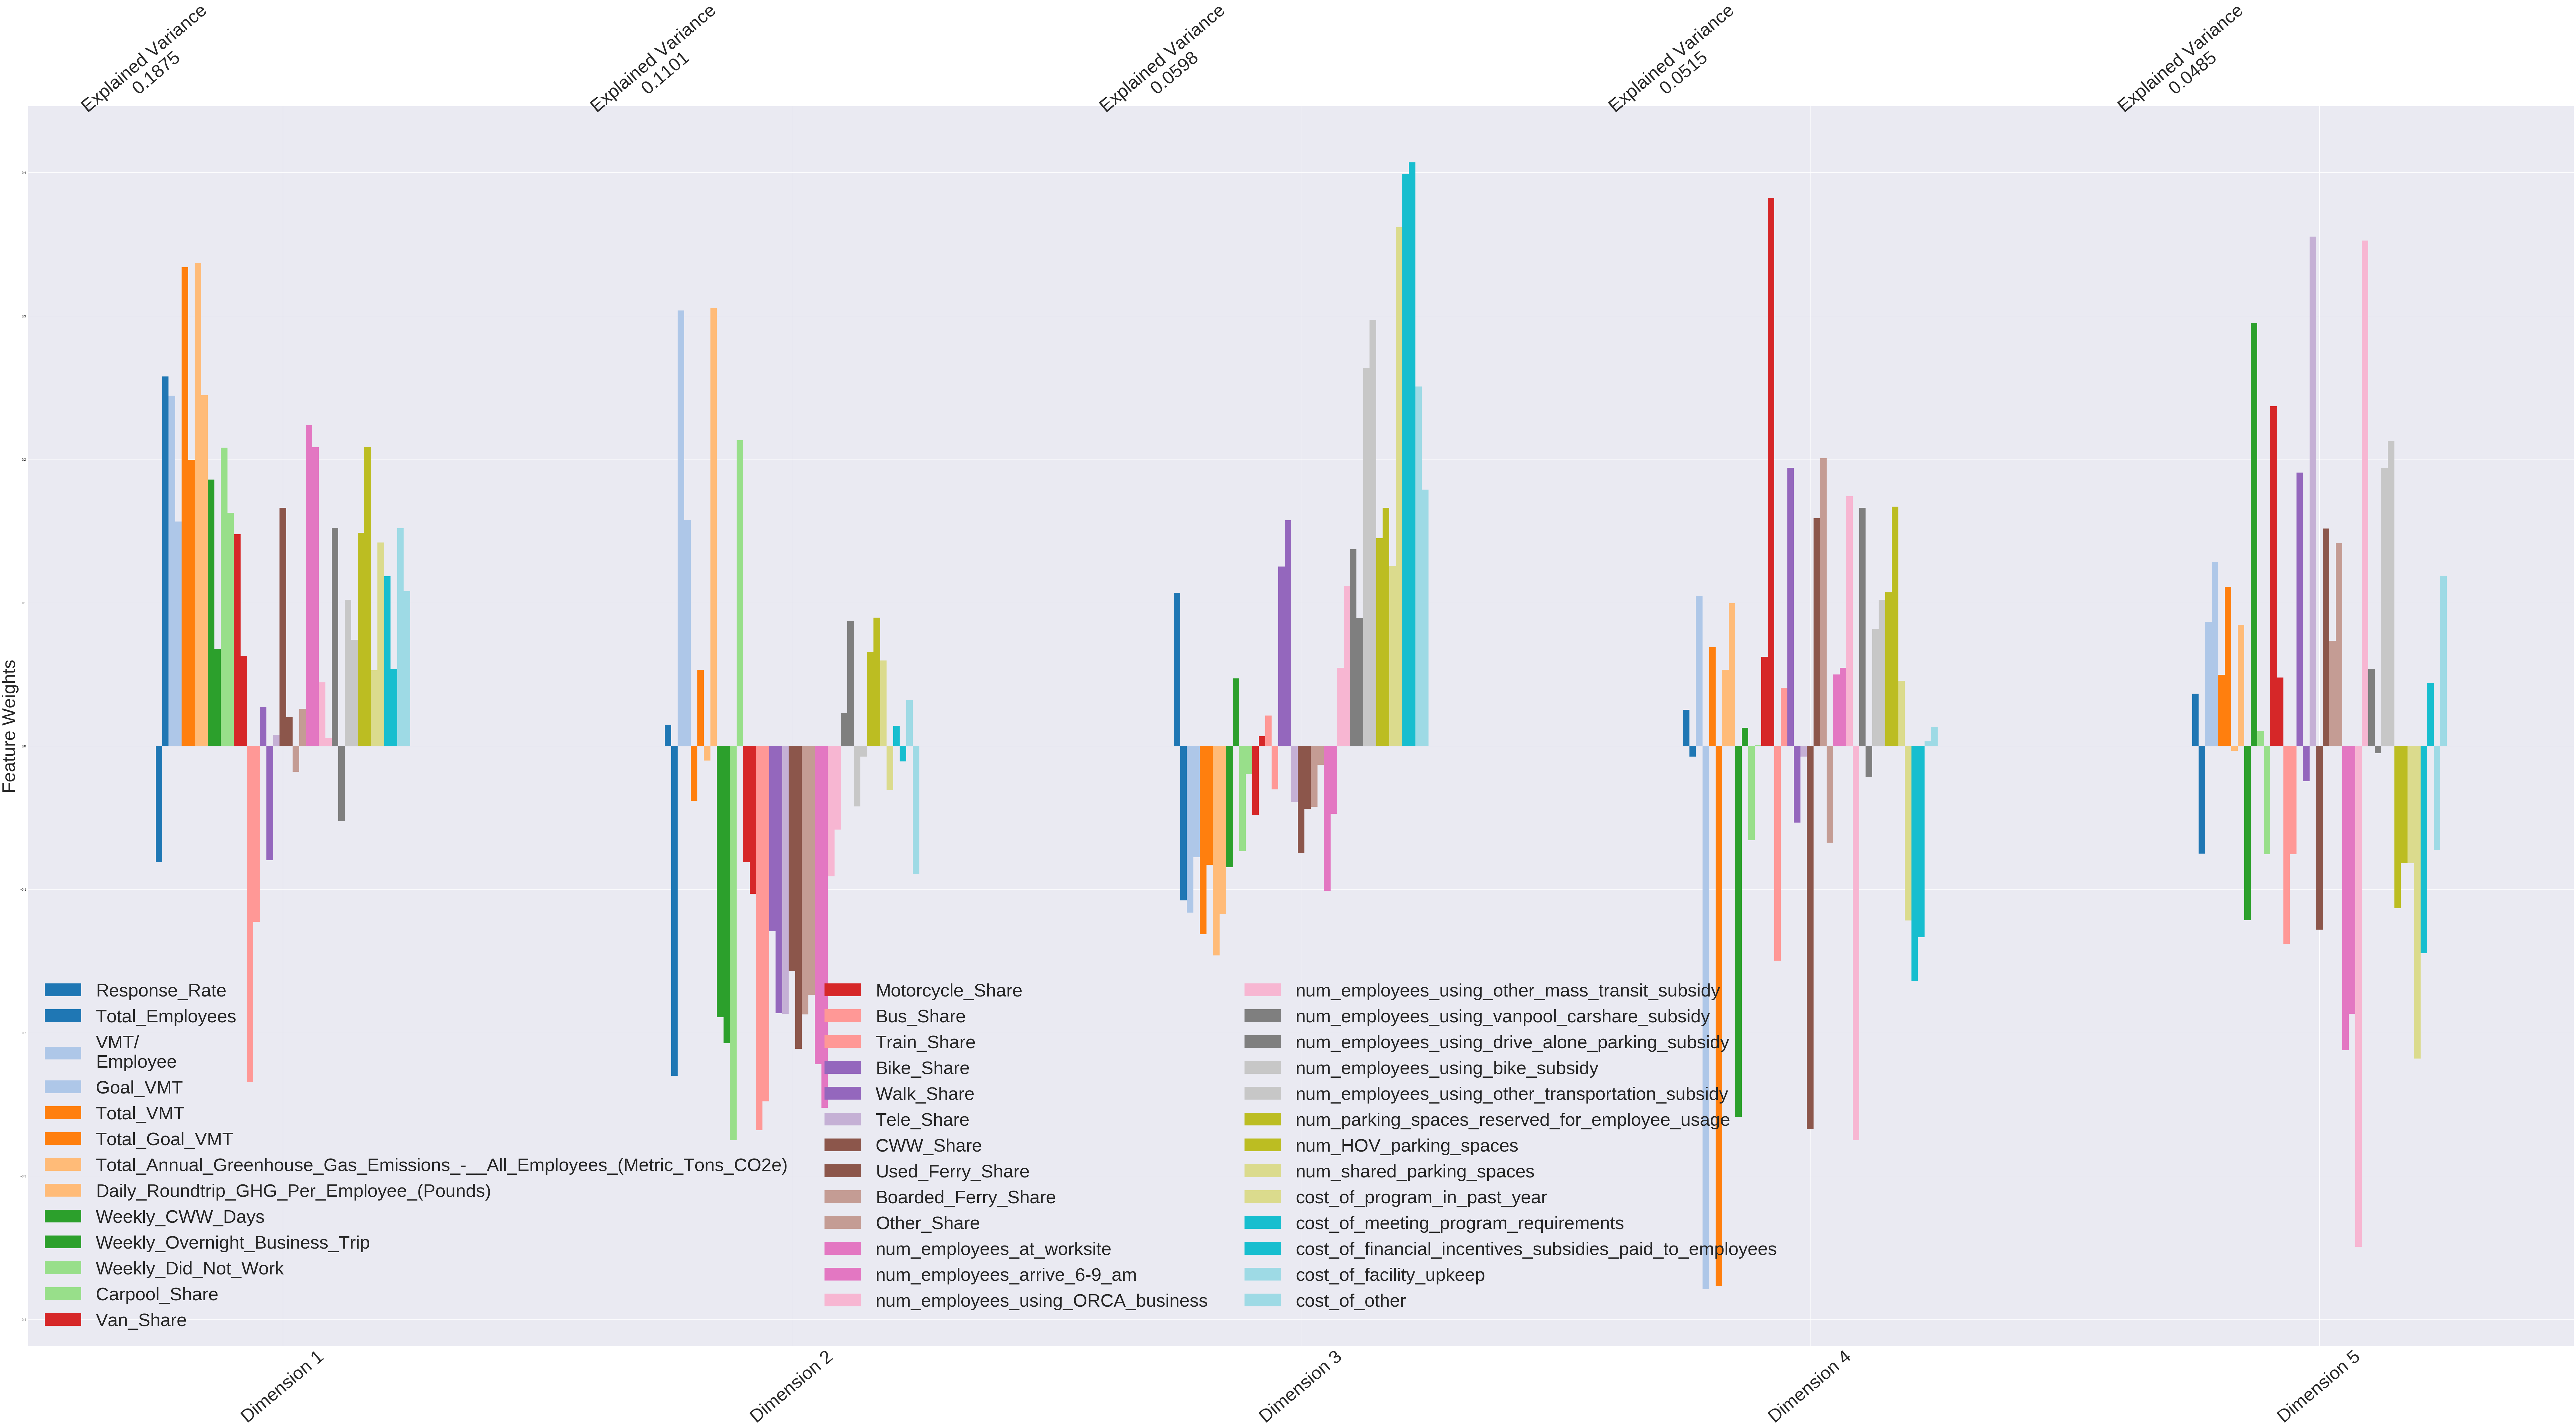

In [22]:
pca_df = viz.pca_results(X_train_sc_df, pca)
# plt.savefig('./figures/pca-loadings-5components.png')

## 5. Cluster Analysis on PCA

* Use unsupervised learning to find clusters of similar data in the principal components.

  8%|▊         | 1/13 [00:00<00:04,  2.46it/s]

For n_clusters = 2 The average silhouette_score is : 0.157920718283


 15%|█▌        | 2/13 [00:00<00:04,  2.64it/s]

For n_clusters = 3 The average silhouette_score is : 0.140233095116


 23%|██▎       | 3/13 [00:01<00:03,  2.72it/s]

For n_clusters = 4 The average silhouette_score is : 0.110708808175


 31%|███       | 4/13 [00:01<00:03,  2.88it/s]

For n_clusters = 5 The average silhouette_score is : 0.106792497756


 38%|███▊      | 5/13 [00:01<00:02,  2.95it/s]

For n_clusters = 6 The average silhouette_score is : 0.103067941934


 46%|████▌     | 6/13 [00:02<00:02,  2.89it/s]

For n_clusters = 7 The average silhouette_score is : 0.101816982409


 54%|█████▍    | 7/13 [00:02<00:02,  2.91it/s]

For n_clusters = 8 The average silhouette_score is : 0.103318729895


 62%|██████▏   | 8/13 [00:02<00:01,  2.83it/s]

For n_clusters = 9 The average silhouette_score is : 0.103356010366


 69%|██████▉   | 9/13 [00:03<00:01,  2.77it/s]

For n_clusters = 10 The average silhouette_score is : 0.101801068229


 77%|███████▋  | 10/13 [00:03<00:01,  2.78it/s]

For n_clusters = 11 The average silhouette_score is : 0.102791666549


 85%|████████▍ | 11/13 [00:03<00:00,  2.78it/s]

For n_clusters = 12 The average silhouette_score is : 0.110252378313


 92%|█████████▏| 12/13 [00:04<00:00,  2.79it/s]

For n_clusters = 13 The average silhouette_score is : 0.10809681847


100%|██████████| 13/13 [00:04<00:00,  2.72it/s]

For n_clusters = 14 The average silhouette_score is : 0.104832475018


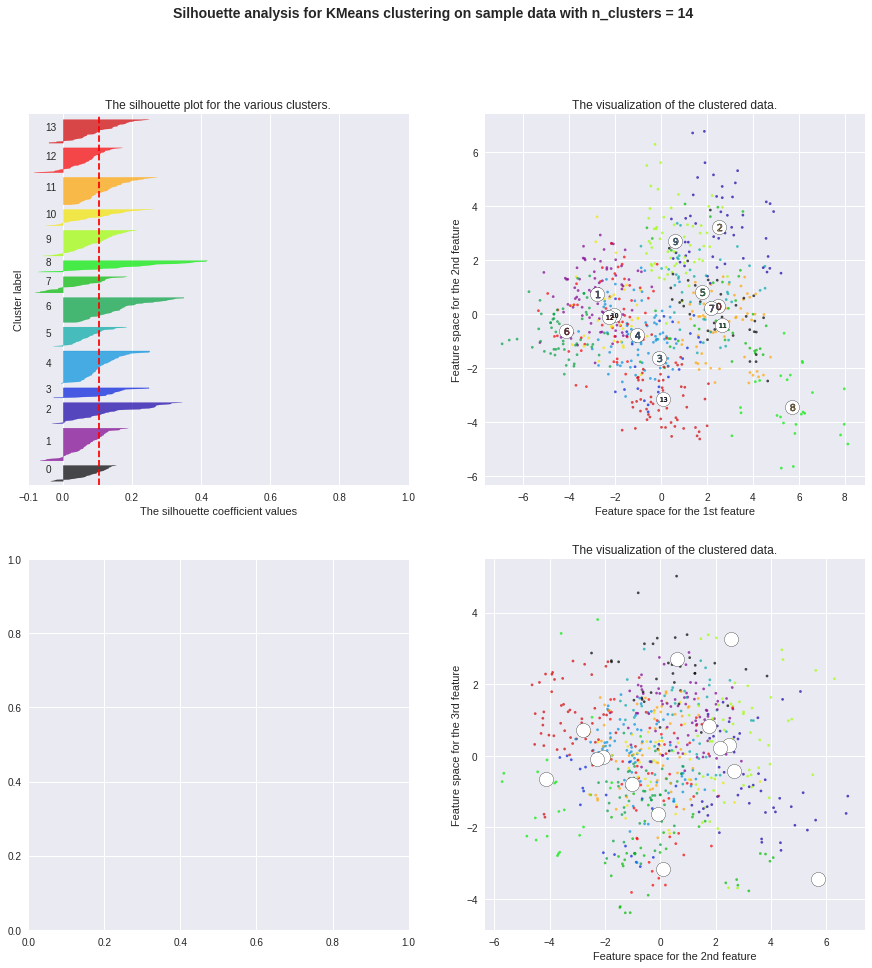

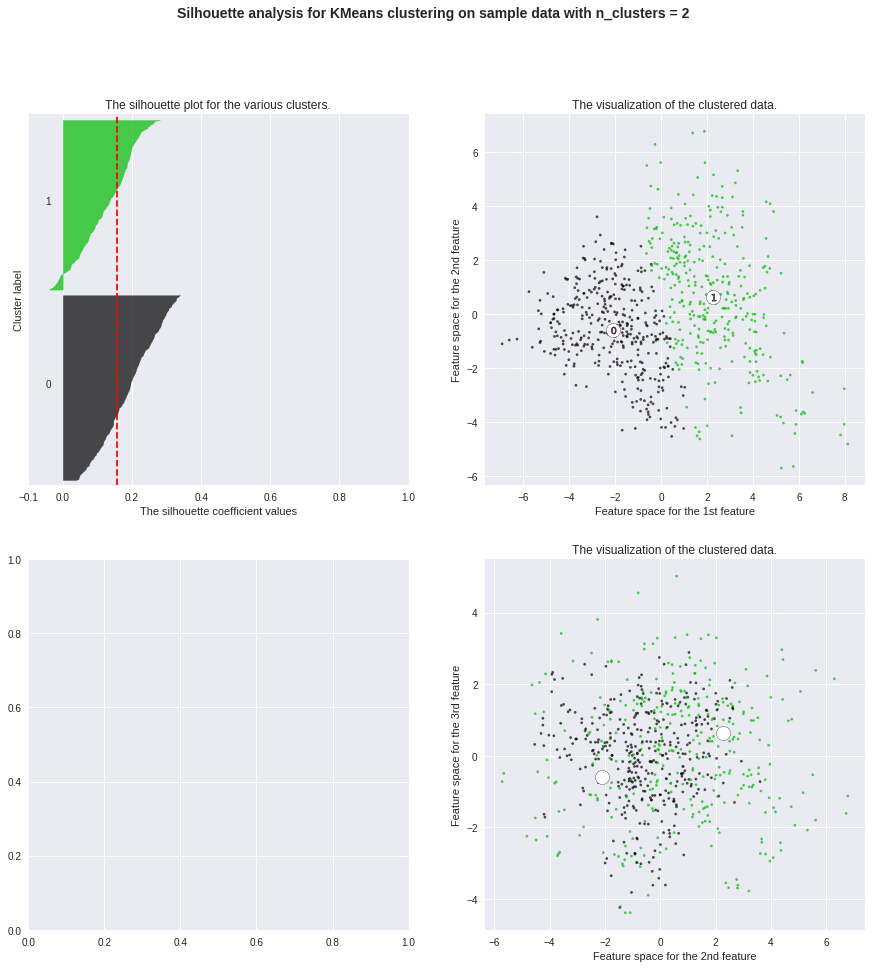

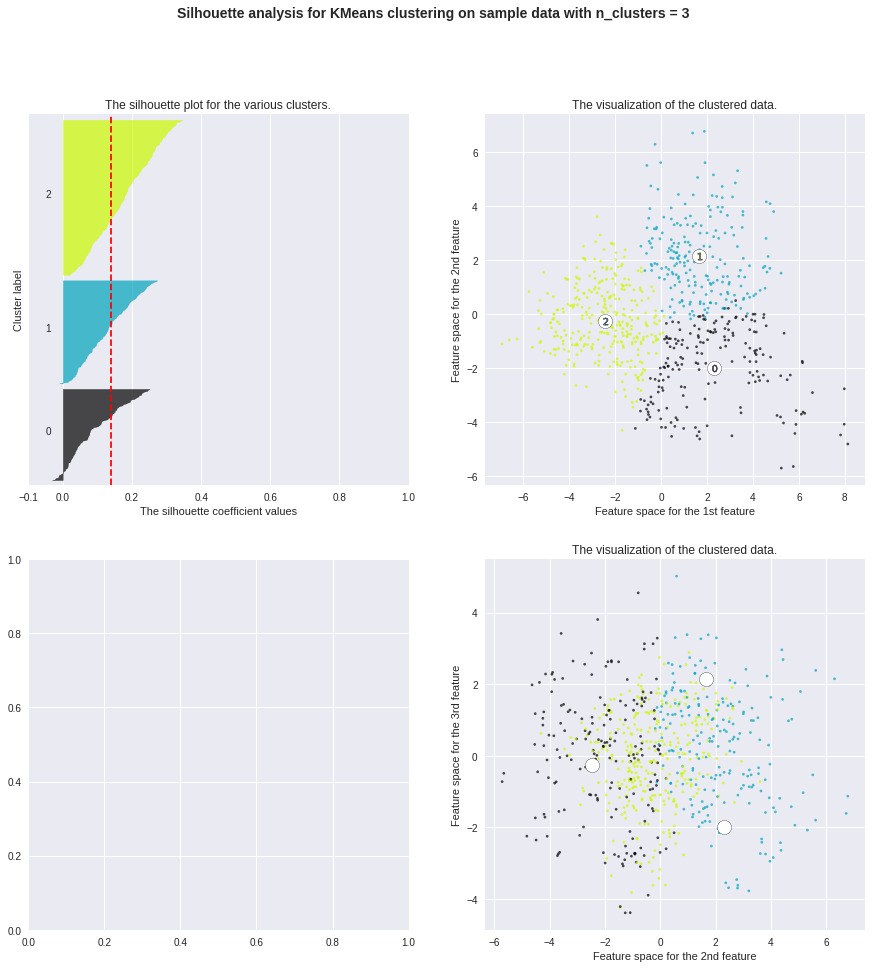

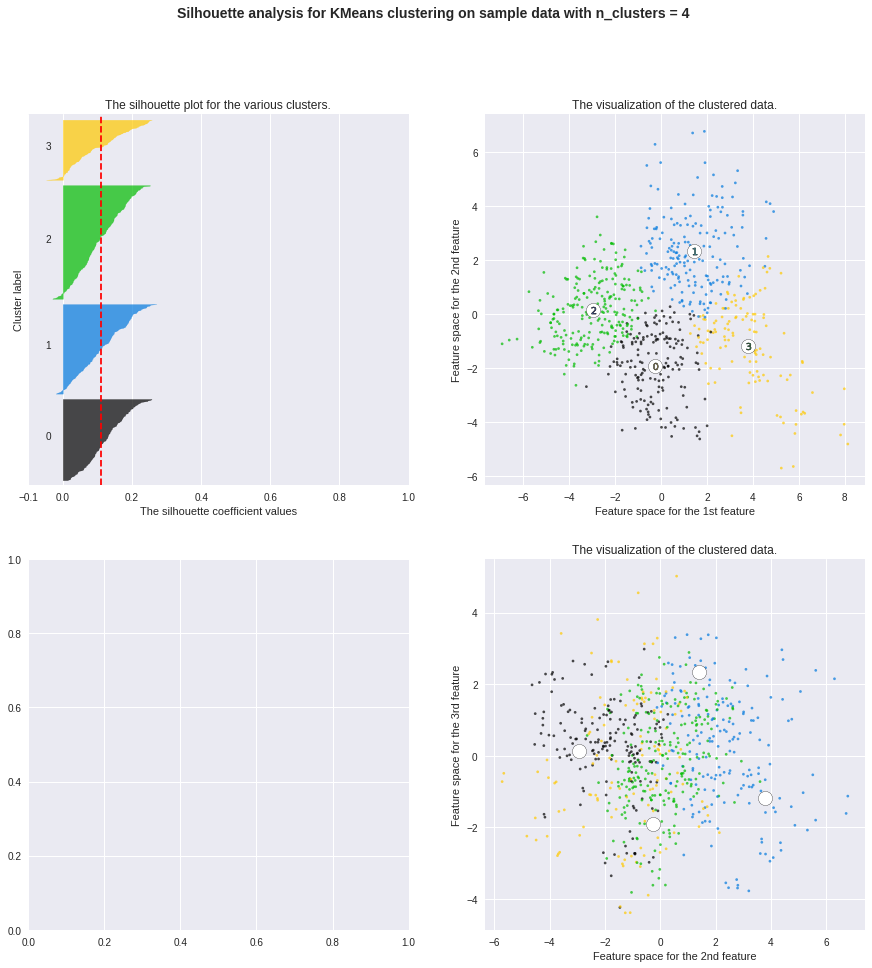

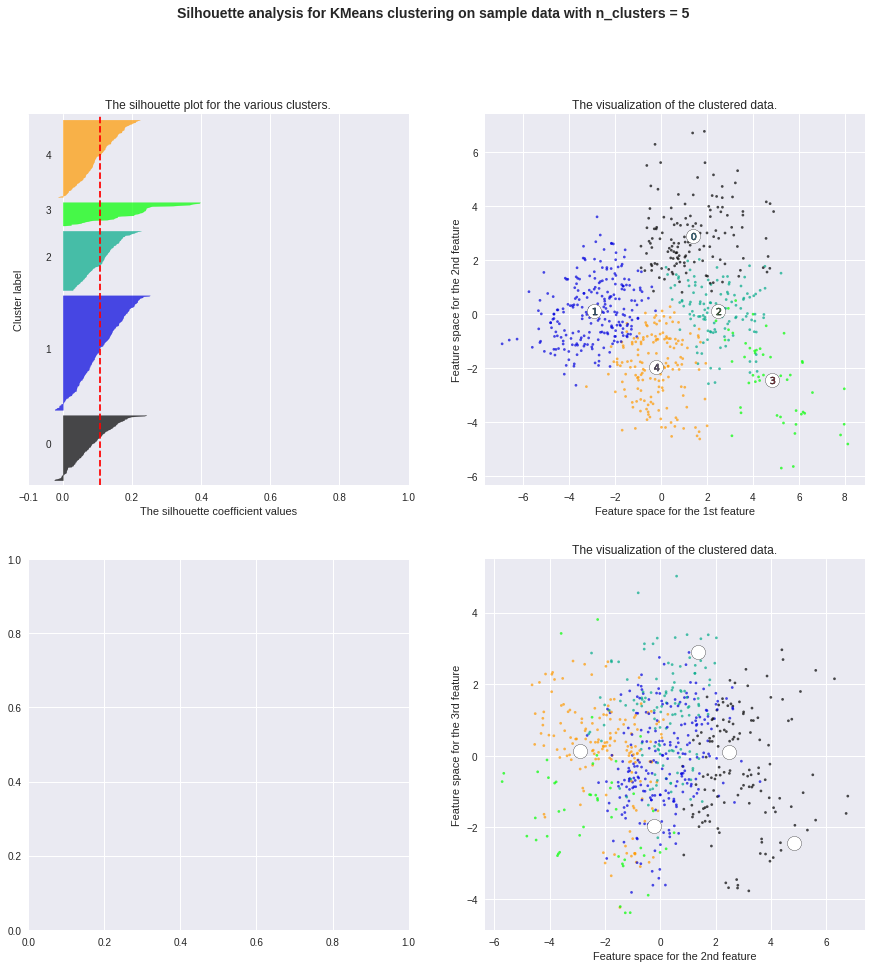

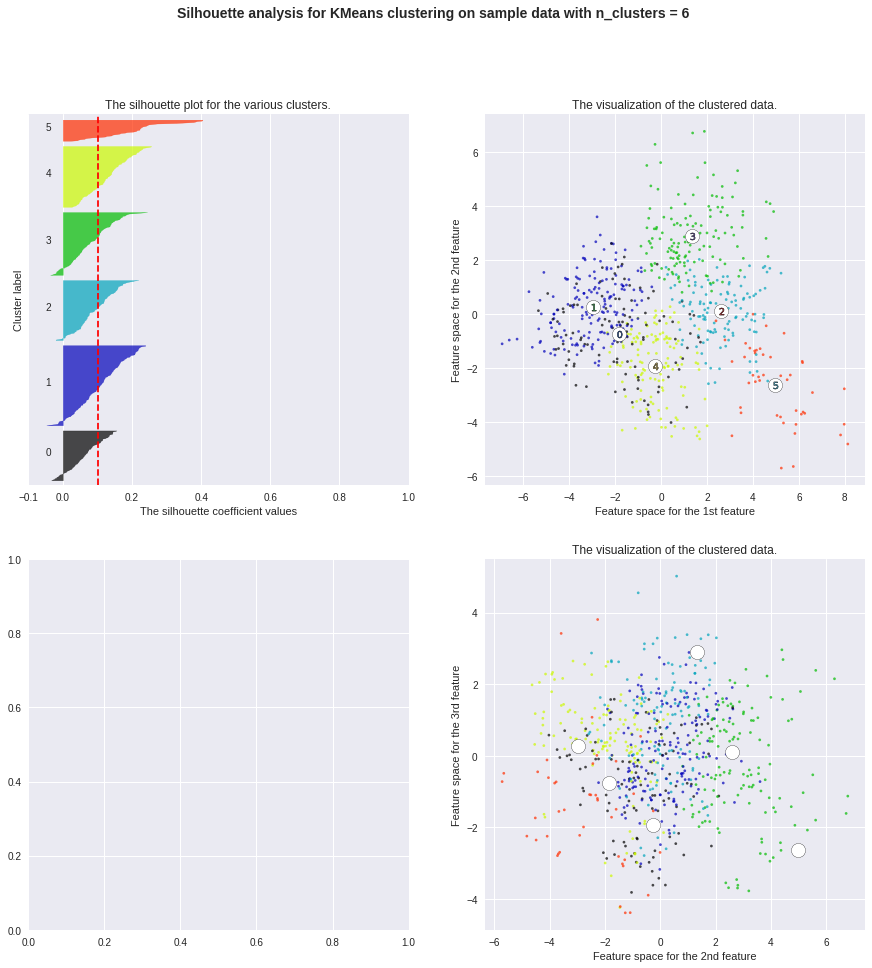

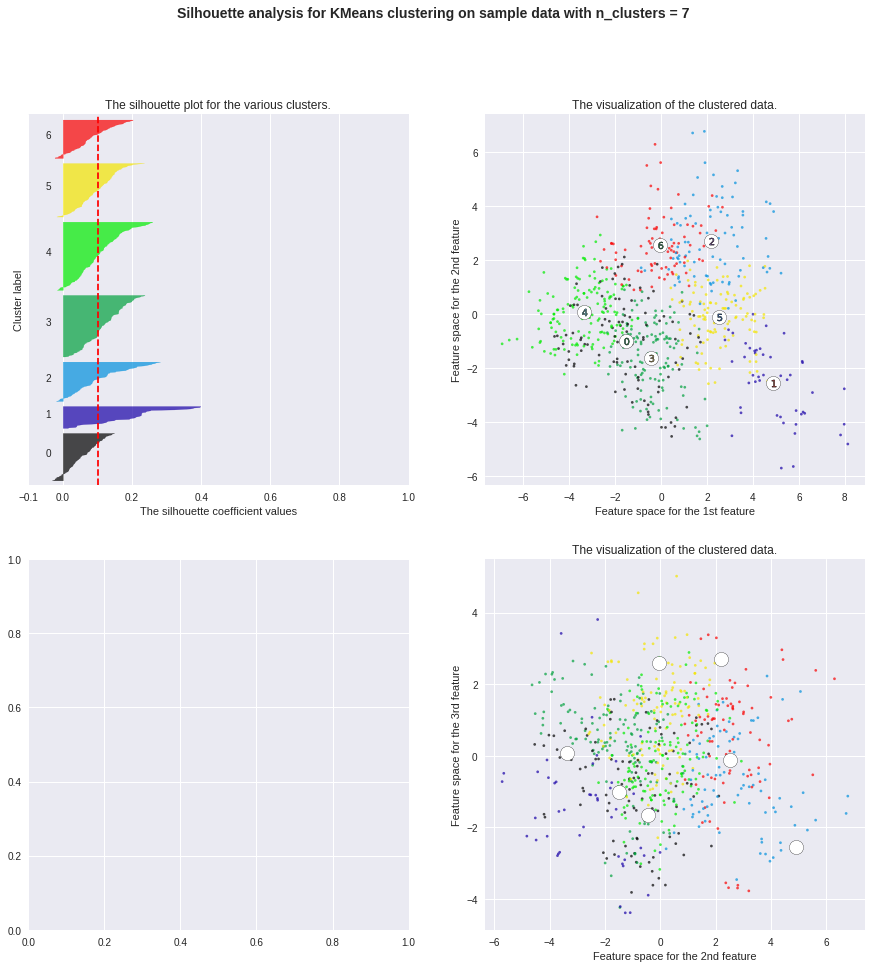

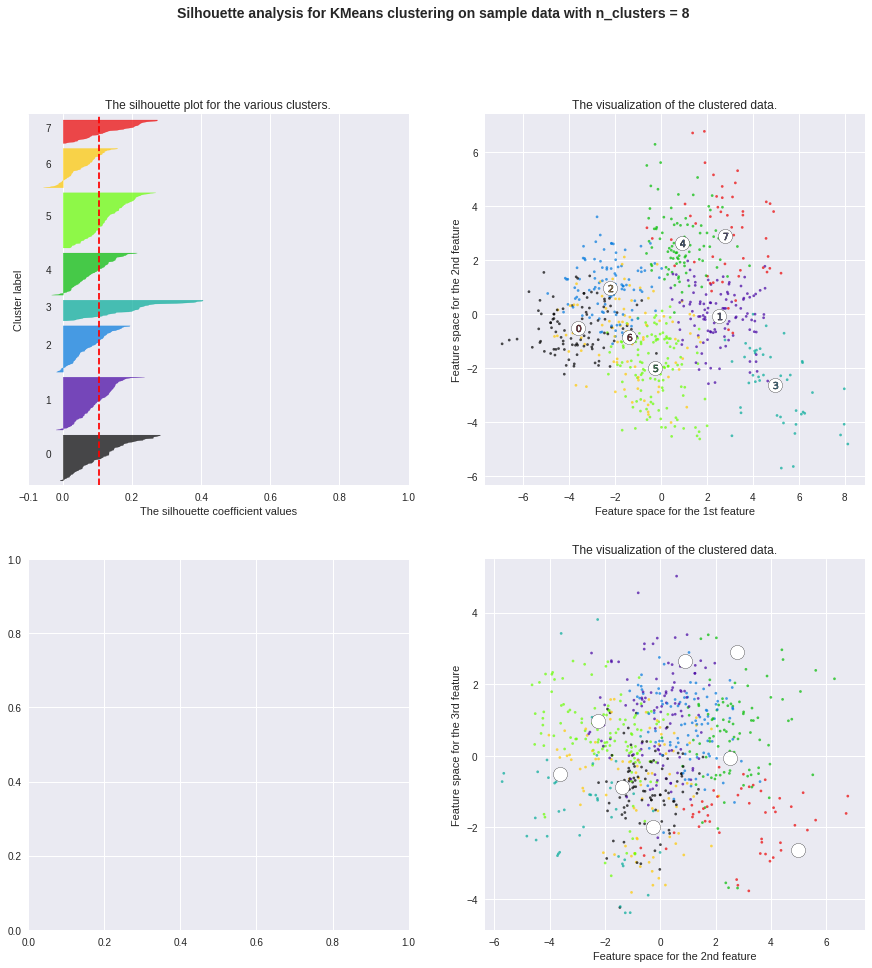

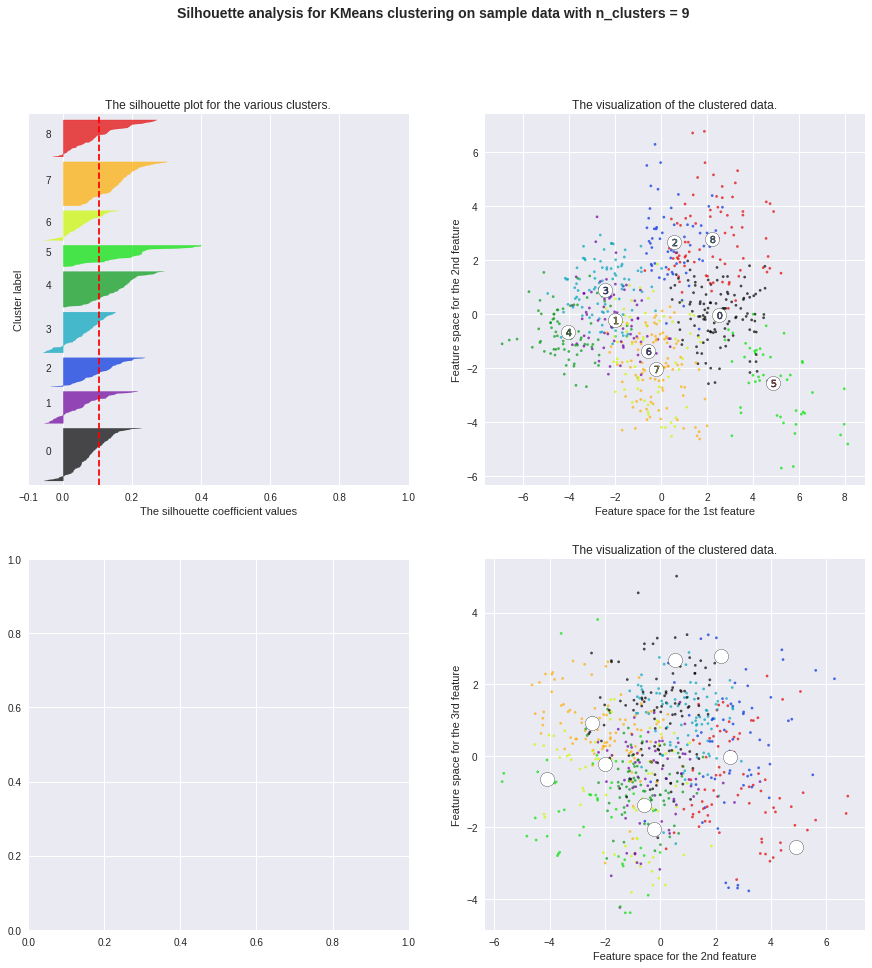

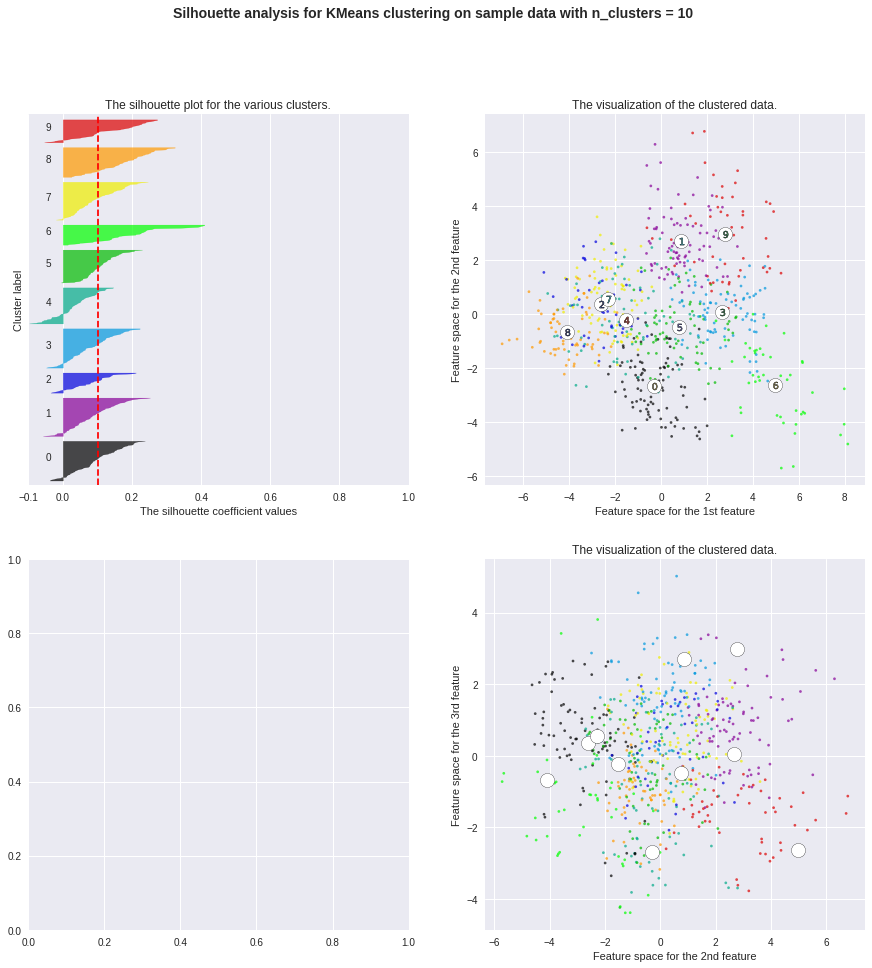

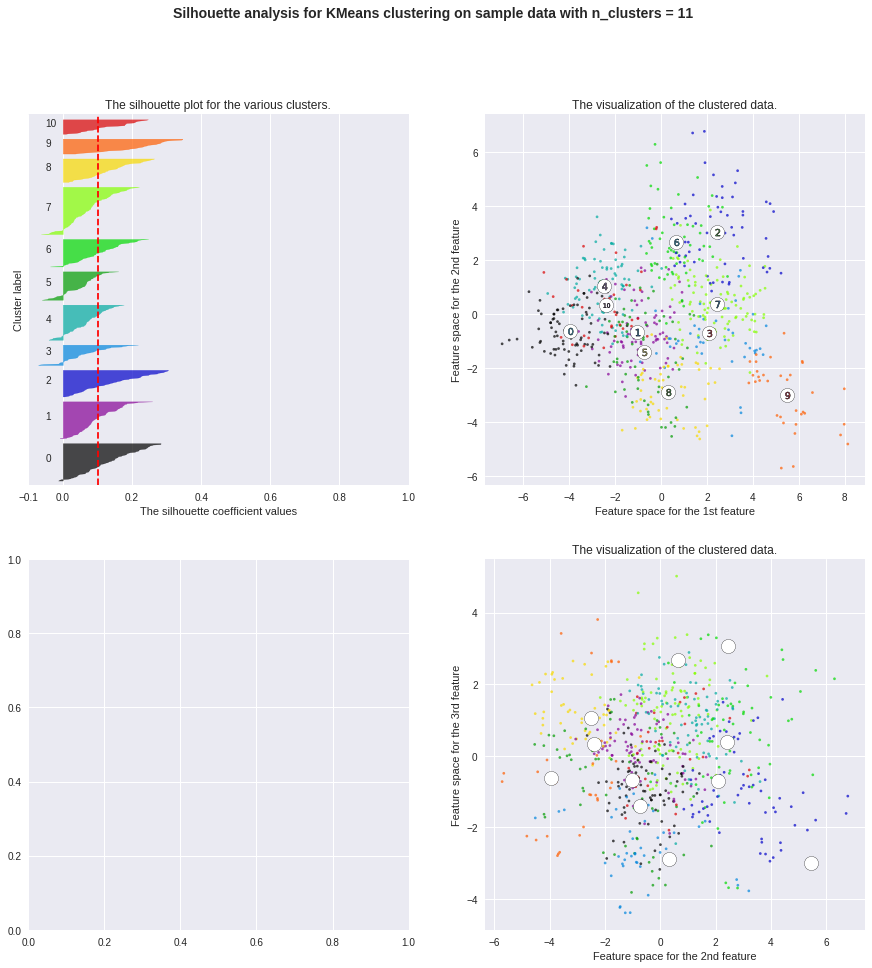

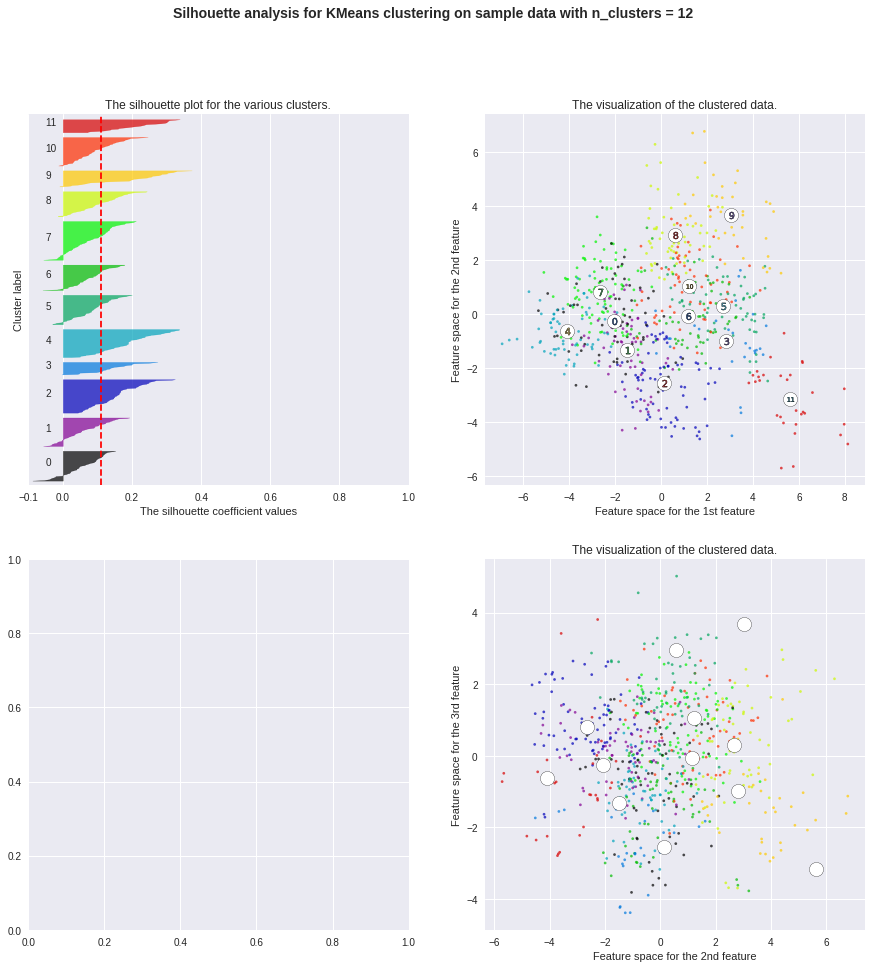

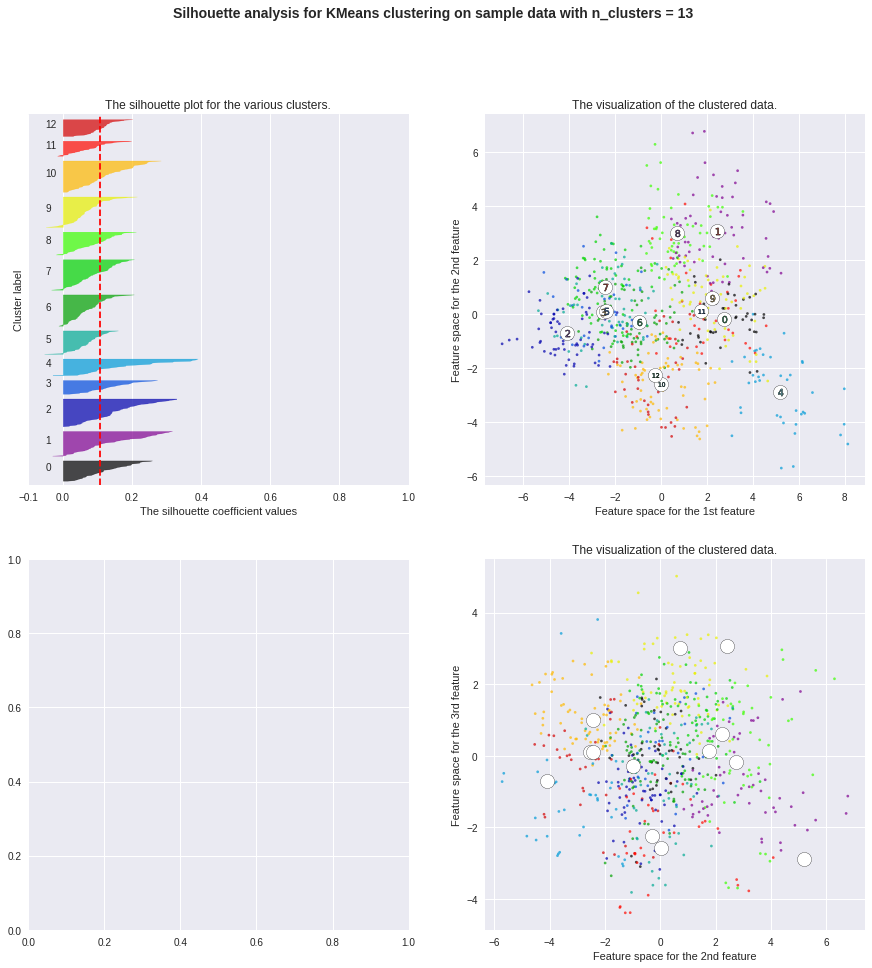

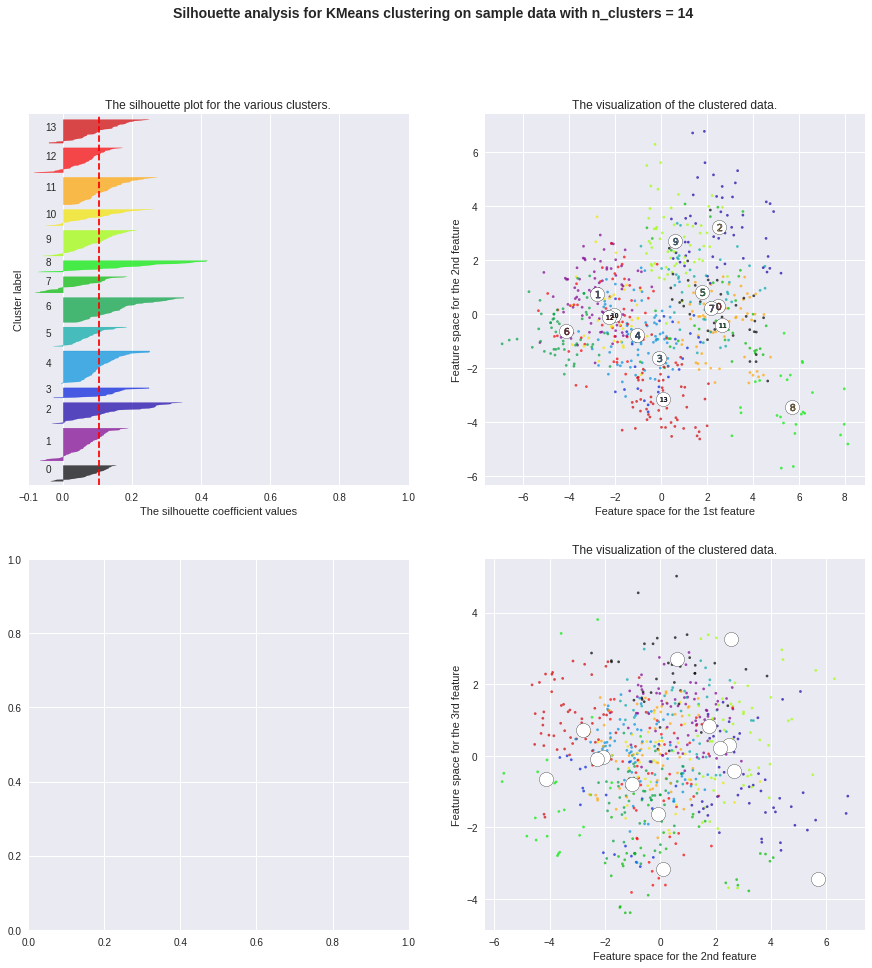

In [20]:
# look at a range of clusters to decide visually which ones represent the data most clearly.
cluster_range(X_train_pca, range(2,15))

100%|██████████| 1/1 [00:00<00:00,  3.76it/s]

For n_clusters = 3 The average silhouette_score is : 0.140301035903


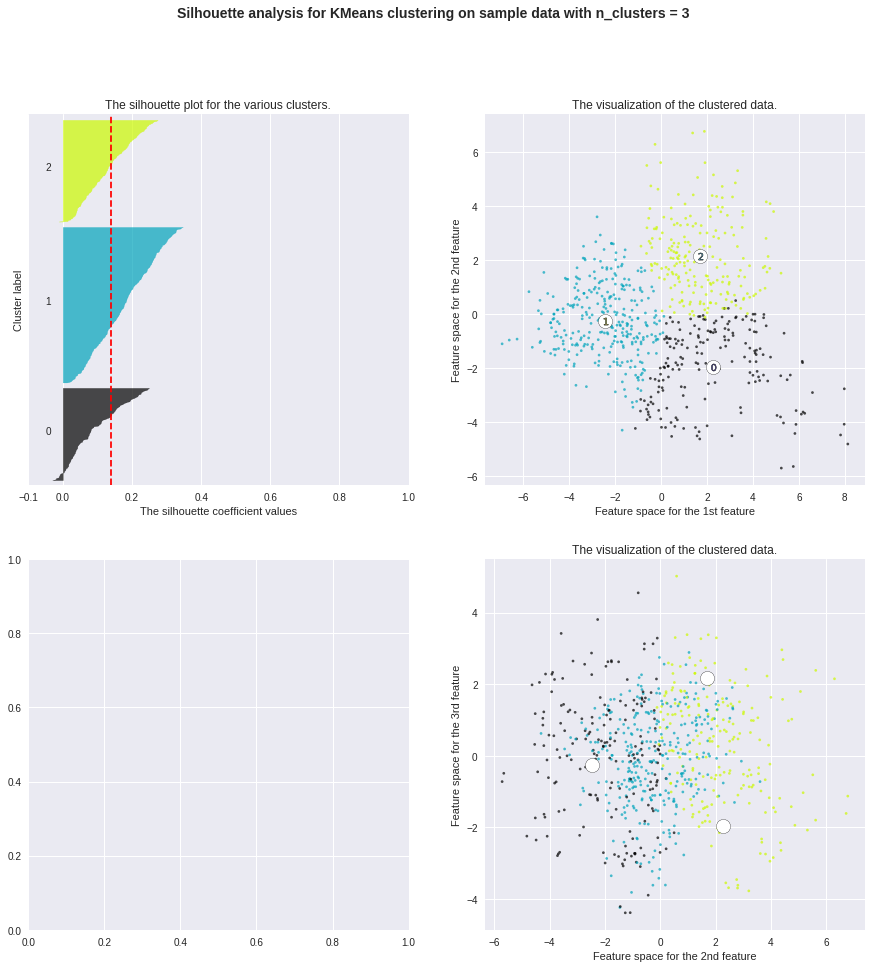

In [21]:
# look at just a cluster of 3, save fig.
cluster_three = cluster_range(X_train_pca, range(3,4))
cluster_three.savefig('./figures/second-try-cluster_analysis_PCA.png')

## 6. Augment Datasets with PCA Data
* Combine numerical and categorical data back together
* Concatenate PCA data to dataset.

In [22]:
for col in X_train_sc_df.columns:
    X_train[col] = X_train_sc_df[col]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
X_train_plus_pca_df = pd.concat([X_train, X_train_pca_df], axis=1)
X_train_plus_pca_df.shape

(704, 100)

In [24]:
for col in X_test_sc_df.columns:
    X_test[col] = X_test_sc_df[col]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
X_test_plus_pca_df = pd.concat([X_test, X_test_pca_df], axis=1)
X_test_plus_pca_df.shape

(303, 100)

## 7. Pickling

In [26]:
# entire X_train and X_test data with augmented deskewed and scaled data and pca data
X_train_plus_pca_df.to_pickle('./data/X_train_plus_pca_df.pkl')
X_test_plus_pca_df.to_pickle('./data/X_test_plus_pca_df.pkl')

# X_train and X_test pca data
X_train_pca_df.to_pickle('./data/X_train_pca_df.pkl')
X_test_pca_df.to_pickle('./data/X_test_pca_df.pkl')

# y_train, y_test to run models.
y_train.to_pickle('./data/y_train_new.pkl')
y_test.to_pickle('./data/y_test_new.pkl')